#read-helio-catalogs

This notebook demonstrates how to use the heliospheric event catalogs in menu "data" on  

https://helioforecast.space

for the ARRCAT, ICMECAT, SIRCAT, LINEUPCAT


Christian Möstl, Austrian Space Weather Office, Geosphere Austria, Graz,  2025 April 25


https://github.com/cmoestl

https://bsky.app/profile/chrisoutofspace.bsky.social

https://bsky.app/profile/aswogeosphere.bsky.social


https://helioforecast.space

Installs sunpy first (takes ~20 seconds) at the start of each session, all other packages can be simply imported without extra installation.

A google account is needed in order to open the notebook in playground mode and run it.


In [2]:
!pip install sunpy

/bin/bash: line 1: /home/dschwarz/Documents/MT/MT_env/bin/pip: cannot execute: required file not found


In [7]:
import pickle
import pandas as pd
import numpy as np
import astropy
import sunpy
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import seaborn as sns
#make figures bigger
plt.rcParams["figure.figsize"] = (10,5)

# HI ARRIVAL CATALOG (ARRCAT)


Read CME arrival catalog (ARRCAT) from heliospheric imager observations (HELCATS HIGeoCAT)

https://helioforecast.space/arrcat

The easiest version is to directly paste the url into a pandas function that makes a pandas dataframe from a csv file.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
url='https://helioforecast.space/static/sync/arrcat/HELCATS_ARRCAT_v20.csv'
ac=pd.read_csv(url)
ac=ac.drop(columns='Unnamed: 0') #drop an extra index column

In [ ]:
ac

,id,sc,target_name,sse_launch_time,target_arrival_time,target_arrival_time_err,target_distance,target_heeq_lon,target_heeq_lat,target_delta,sse_heeq_lon,sse_heeq_lat,sse_speed,sse_speed_err,target_speed,target_speed_err,pa_fit,pa_n,pa_s,pa_center
0,HCME_A__20250226_01,A,JUNO,2025-02-26T15:52Z,2025-03-08T14:26Z,28.8,5.098,-84.40,-1.66,6.6,-91,-13,900,107,888,106,110,70,145,107.5
1,HCME_A__20250224_01,A,JUNO,2025-02-24T01:20Z,2025-03-05T08:42Z,29.1,5.101,-81.36,-1.54,9.6,-91,-23,977,125,949,121,120,100,130,115.0
2,HCME_A__20250214_01,A,JUNO,2025-02-13T16:44Z,2025-03-02T07:36Z,15.6,5.100,-78.58,-1.34,13.4,-92,12,563,22,531,21,80,50,95,72.5
3,HCME_A__20250226_01,A,Mercury,2025-02-26T15:52Z,2025-02-27T09:19Z,2.1,0.316,-113.23,3.30,-22.2,-91,-13,900,107,752,89,110,70,145,107.5
4,HCME_A__20250226_01,A,BepiColombo,2025-02-26T15:52Z,2025-02-27T06:02Z,1.7,0.306,-94.01,3.35,-3.0,-91,-13,900,107,898,107,110,70,145,107.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,HCME_A__20070516_01,A,VEX,2007-05-15T16:24Z,2007-05-18T23:10Z,0.2,0.720,-58.21,-3.77,-5.2,-53,16,383,1,380,1,70,30,120,75.0
3092,HCME_A__20070516_01,A,MESSENGER,2007-05-15T16:24Z,2007-05-18T14:19Z,0.2,0.630,-61.59,-0.81,-8.6,-53,16,383,1,374,1,70,30,120,75.0
3093,HCME_A__20070509_01,A,Mercury,2007-05-09T06:13Z,2007-05-10T07:53Z,2.8,0.308,-142.21,2.96,-0.2,-142,2,499,54,499,54,90,50,125,87.5
3094,HCME_A__20070419_01,A,VEX,2007-04-19T06:50Z,2007-04-22T23:35Z,0.5,0.719,-75.33,-3.45,-20.3,-55,-15,389,2,336,2,105,40,140,90.0


In [ ]:
print('get keys of ac dataframe')
print(ac.keys())

print('time as numpy array in matp')
ac_time_num=parse_time(ac.sse_launch_time).plot_date
print(ac_time_num)
print()

print('target distance as numpy array')
ac_target_distance=np.array(ac.target_distance)
print(ac_target_distance)


get keys of ac dataframe
Index(['id', 'sc', 'target_name', 'sse_launch_time', 'target_arrival_time',
       'target_arrival_time_err', 'target_distance', 'target_heeq_lon',
       'target_heeq_lat', 'target_delta', 'sse_heeq_lon', 'sse_heeq_lat',
       'sse_speed', 'sse_speed_err', 'target_speed', 'target_speed_err',
       'pa_fit', 'pa_n', 'pa_s', 'pa_center'],
      dtype='object')
time as numpy array in matp
[20145.66111111 20143.05555556 20132.69722222 ... 13642.25902778
 13622.28472222 13622.28472222]

target distance as numpy array
[5.098 5.101 5.1   ... 0.308 0.719 0.718]


Make 2 plots


<ipython-input-6-211d603a5ad5>:4: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(ac_time_num,ac_target_distance,'ok')


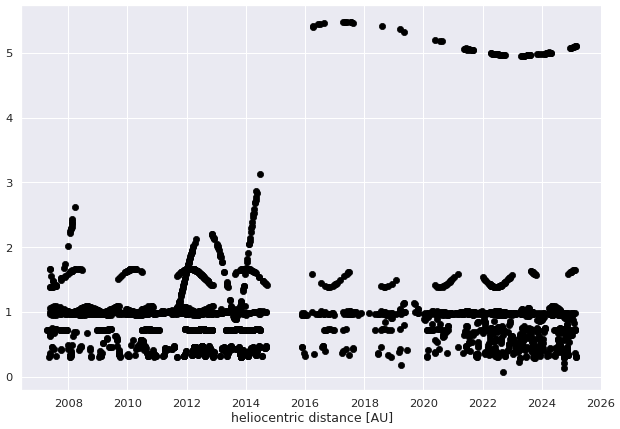

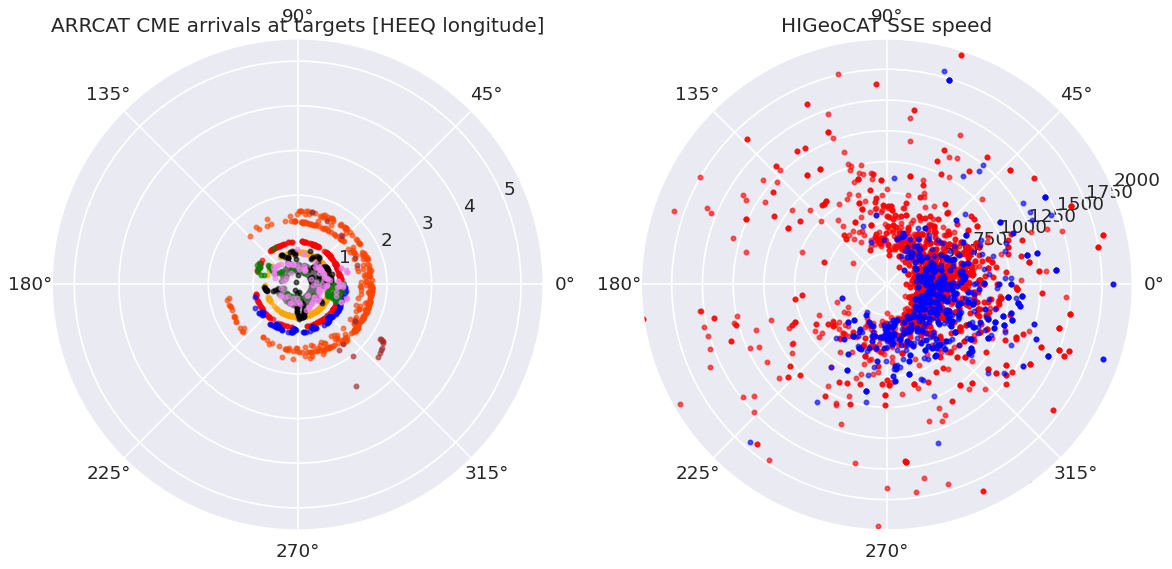

In [ ]:

sns.set_context("talk")
sns.set_style('darkgrid')
fig=plt.figure(1,figsize=(15,10),dpi=50)
plt.plot_date(ac_time_num,ac_target_distance,'ok')
plt.xlabel('heliocentric distance [AU]')



fig=plt.figure(2, figsize=(15,10), dpi=80)
ax = plt.subplot(121,projection='polar')

plt.title('ARRCAT CME arrivals at targets [HEEQ longitude]')

#get indices for each target
merci=np.where(ac.target_name=='Mercury')[0]
venusi=np.where(ac.target_name=='Venus')[0]
earthi=np.where(ac.target_name=='Earth_L1')[0]
marsi=np.where(ac.target_name=='Mars')[0]

stai=np.where(ac.target_name=='STEREO-A')[0]
stbi=np.where(ac.target_name=='STEREO-B')[0]
pspi=np.where(ac.target_name=='PSP')[0]
soloi=np.where(ac.target_name=='SolarOrbiter')[0]
bepii=np.where(ac.target_name=='BepiColombo')[0]
ulyi=np.where(ac.target_name=='Ulysses')[0]

#markersize
ms=15
#alpha
al=0.6

ax.scatter(np.radians(ac.target_heeq_lon[merci]),ac.target_distance[merci],s=ms,c='dimgrey', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[venusi]),ac.target_distance[venusi],s=ms,c='orange', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[earthi]),ac.target_distance[earthi],s=ms,c='mediumseagreen', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[marsi]),ac.target_distance[marsi],s=ms,c='orangered', alpha=al)

ax.scatter(np.radians(ac.target_heeq_lon[stai]),ac.target_distance[stai],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[stbi]),ac.target_distance[stbi],s=ms,c='blue', alpha=al)

ax.scatter(np.radians(ac.target_heeq_lon[pspi]),ac.target_distance[pspi],s=ms,c='black', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[soloi]),ac.target_distance[soloi],s=ms,c='green', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[bepii]),ac.target_distance[bepii],s=ms,c='violet', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[ulyi]),ac.target_distance[ulyi],s=ms,c='brown', alpha=al)

plt.ylim([0,np.max(ac.target_distance)+0.03])



ax = plt.subplot(122,projection='polar')
plt.title('HIGeoCAT SSE speed')
hiai=np.where(ac.sc=='A')[0]
hibi=np.where(ac.sc=='B')[0]

ax.scatter(np.radians(ac.sse_heeq_lon[hiai].astype(float)),ac.sse_speed[hiai],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ac.sse_heeq_lon[hibi].astype(float)),ac.sse_speed[hibi],s=ms,c='blue', alpha=al)

plt.ylim([0,2000])

plt.tight_layout()



# ICMECAT


Read ICMECAT

In [5]:
url='https://helioforecast.space/static/sync/icmecat/HELIO4CAST_ICMECAT_v23.csv'
ic=pd.read_csv(url)
ic=ic.drop(columns='Unnamed: 0') #drop an extra index column

In [6]:
print(ic.keys())
ic

Index(['icmecat_id', 'sc_insitu', 'icme_start_time', 'mo_start_time',
       'mo_end_time', 'mo_sc_heliodistance', 'mo_sc_long_heeq',
       'mo_sc_lat_heeq', 'icme_duration', 'icme_bmax', 'icme_bmean',
       'icme_bstd', 'icme_speed_mean', 'icme_speed_std', 'mo_duration',
       'mo_bmax', 'mo_bmean', 'mo_bstd', 'mo_bzmean', 'mo_bzmin', 'mo_bzstd',
       'mo_bymean', 'mo_bystd', 'mo_speed_mean', 'mo_speed_std',
       'mo_expansion_speed', 'mo_pdyn_mean', 'mo_pdyn_std', 'mo_density_mean',
       'mo_density_std', 'mo_temperature_mean', 'mo_temperature_std',
       'sheath_speed_mean', 'sheath_speed_std', 'sheath_density_mean',
       'sheath_density_std', 'sheath_pdyn_mean', 'sheath_pdyn_std'],
      dtype='object')


,icmecat_id,sc_insitu,icme_start_time,mo_start_time,mo_end_time,mo_sc_heliodistance,mo_sc_long_heeq,mo_sc_lat_heeq,icme_duration,icme_bmax,...,mo_density_mean,mo_density_std,mo_temperature_mean,mo_temperature_std,sheath_speed_mean,sheath_speed_std,sheath_density_mean,sheath_density_std,sheath_pdyn_mean,sheath_pdyn_std
0,ICME_STEREO_A_MOESTL_20241220_01,STEREO-A,2024-12-20T11:32Z,2024-12-20T14:44Z,2024-12-20T22:34Z,0.9672,28.58,-4.96,11.03,12.8,...,3.0,1.4,0.0,0.0,363.6,7.7,8.9,2.7,2.0,0.6
1,ICME_STEREO_A_MOESTL_20241218_01,STEREO-A,2024-12-18T06:17Z,2024-12-18T22:32Z,2024-12-20T02:00Z,0.9672,28.54,-4.79,43.72,24.8,...,2.2,0.7,0.0,0.0,338.7,23.2,14.1,5.1,2.6,0.8
2,ICME_Wind_MOESTL_20241217_01,Wind,2024-12-17T04:28Z,2024-12-17T05:28Z,2024-12-17T14:16Z,0.9732,-0.10,-1.17,9.80,32.0,...,20.3,10.0,297500.0,323800.5,541.5,19.5,42.2,6.7,20.9,4.5
3,ICME_BEPI_MOESTL_20241216_01,BepiColombo,2024-12-16T04:02Z,2024-12-16T06:39Z,2024-12-16T15:39Z,0.3343,51.21,-1.93,11.62,87.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ICME_Wind_MOESTL_20241207_01,Wind,2024-12-07T23:14Z,2024-12-07T23:14Z,2024-12-08T17:50Z,0.9746,-0.17,0.02,18.60,10.2,...,7.8,3.6,65012.1,33690.2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,ICME_ULY_RICHARDSON_19910305_01,ULYSSES,1991-03-05T00:00Z,1991-03-05T00:00Z,1991-03-08T20:00Z,2.2833,-41.33,-3.42,92.00,4.7,...,1.3,1.1,25501.7,11677.5,NaN,NaN,NaN,NaN,NaN,NaN
1897,ICME_ULY_RICHARDSON_19910226_01,ULYSSES,1991-02-26T22:00Z,1991-02-26T22:00Z,1991-02-27T17:00Z,2.2166,-36.80,-3.26,19.00,4.7,...,0.9,0.4,65951.4,24933.2,NaN,NaN,NaN,NaN,NaN,NaN
1898,ICME_ULY_RICHARDSON_19910116_01,ULYSSES,1991-01-16T16:00Z,1991-01-16T16:00Z,1991-01-18T11:00Z,1.7583,-9.09,-1.75,43.00,3.1,...,0.9,0.1,55306.4,21032.7,NaN,NaN,NaN,NaN,NaN,NaN
1899,ICME_ULY_RICHARDSON_19901225_01,ULYSSES,1990-12-25T14:00Z,1990-12-25T14:00Z,1990-12-28T12:00Z,1.5160,2.18,-0.49,70.00,5.4,...,1.8,1.1,52144.3,36250.8,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-9-e655ae89f7c2>:7: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(ic_mo_start_time_num,ic.mo_sc_heliodistance,'ok',markersize=3)


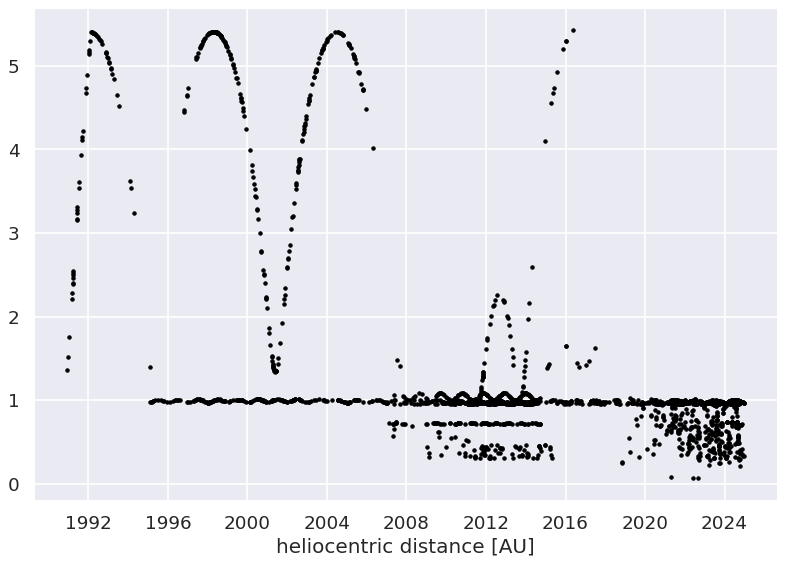

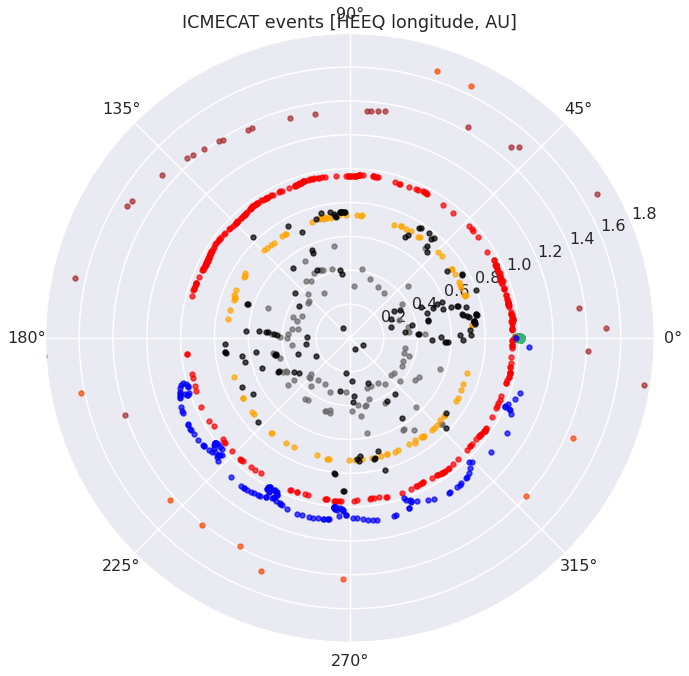

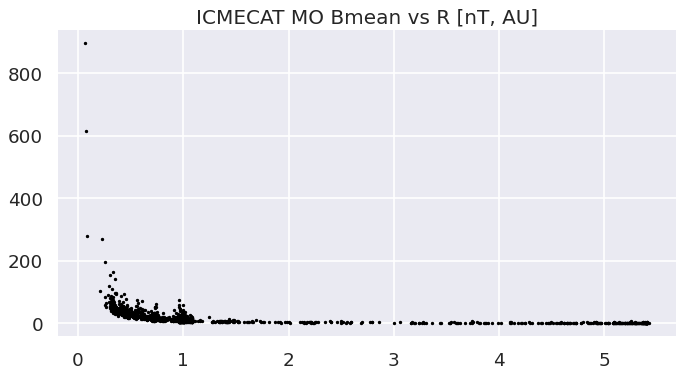

In [ ]:
sns.set_context("talk")
sns.set_style('darkgrid')

###############################################################################
fig=plt.figure(3,figsize=(12,8),dpi=80)
ic_mo_start_time_num=parse_time(ic.mo_start_time).plot_date
plt.plot_date(ic_mo_start_time_num,ic.mo_sc_heliodistance,'ok',markersize=3)
plt.xlabel('heliocentric distance [AU]')


##############################################################################
fig=plt.figure(4, figsize=(15,10), dpi=70)
ax = plt.subplot(111,projection='polar')

plt.title('ICMECAT events [HEEQ longitude, AU]')

#get indices for each target
imes=np.where(ic.sc_insitu=='MESSENGER')[0]
ivex=np.where(ic.sc_insitu=='VEX')[0]
iwin=np.where(ic.sc_insitu=='Wind')[0]
imav=np.where(ic.sc_insitu=='MAVEN')[0]

ista=np.where(ic.sc_insitu=='STEREO-A')[0]
istb=np.where(ic.sc_insitu=='STEREO-B')[0]
ipsp=np.where(ic.sc_insitu=='PSP')[0]
#soloi=np.where(ac.target_name=='SolarOrbiter')[0]
#bepii=np.where(ac.target_name=='BepiColombo')[0]
iuly=np.where(ic.sc_insitu=='ULYSSES')[0]

#markersize
ms=25
#alpha
al=0.7


ax.scatter(np.radians(ic.mo_sc_long_heeq[imes]),ic.mo_sc_heliodistance	[imes],s=ms,c='dimgrey', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[ivex]),ic.mo_sc_heliodistance	[ivex],s=ms,c='orange', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[iwin]),ic.mo_sc_heliodistance	[iwin],s=ms,c='mediumseagreen', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[imav]),ic.mo_sc_heliodistance	[imav],s=ms,c='orangered', alpha=al)

ax.scatter(np.radians(ic.mo_sc_long_heeq[ista]),ic.mo_sc_heliodistance[ista],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[istb]),ic.mo_sc_heliodistance[istb],s=ms,c='blue', alpha=al)

ax.scatter(np.radians(ic.mo_sc_long_heeq[ipsp]),ic.mo_sc_heliodistance[ipsp],s=ms,c='black', alpha=al)
#ax.scatter(np.radians(ac.target_heeq_lon[soloi]),ac.target_distance[soloi],s=ms,c='green', alpha=al)
#ax.scatter(np.radians(ac.target_heeq_lon[bepii]),ac.target_distance[bepii],s=ms,c='violet', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[iuly]),ic.mo_sc_heliodistance[iuly],s=ms,c='brown', alpha=al)

plt.ylim([0,1.8])
plt.tight_layout()



##############################################################################

fig=plt.figure(5, figsize=(10,5), dpi=80)
plt.title('ICMECAT MO Bmean vs R [nT, AU]')
plt.plot(ic.mo_sc_heliodistance,ic.mo_bmean,'ok',markersize=2)


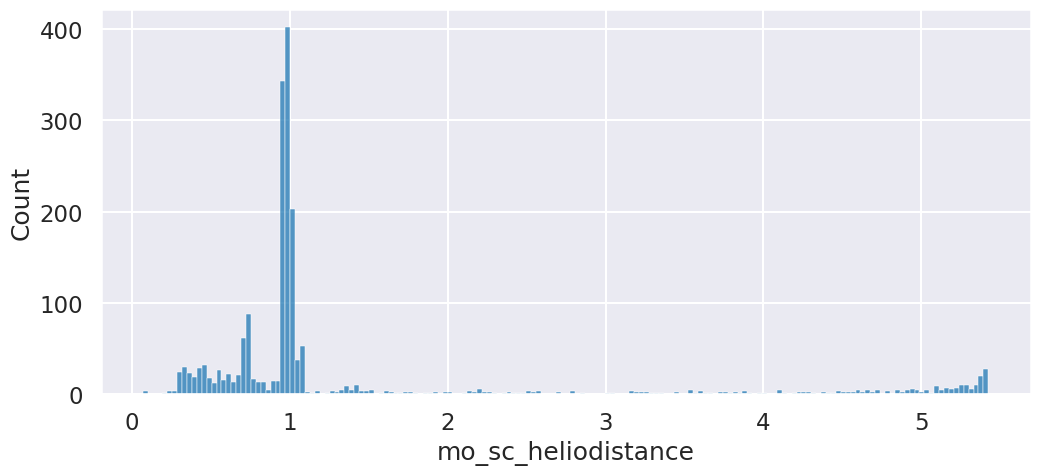

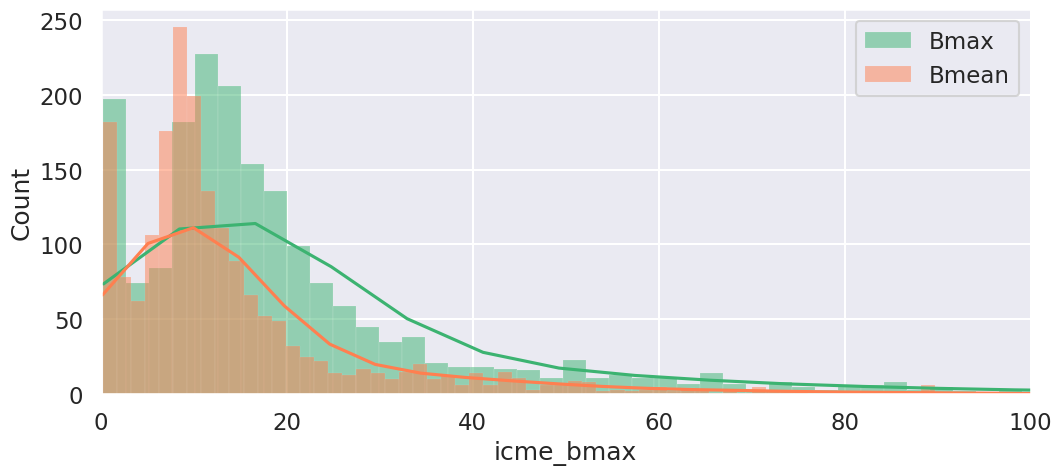

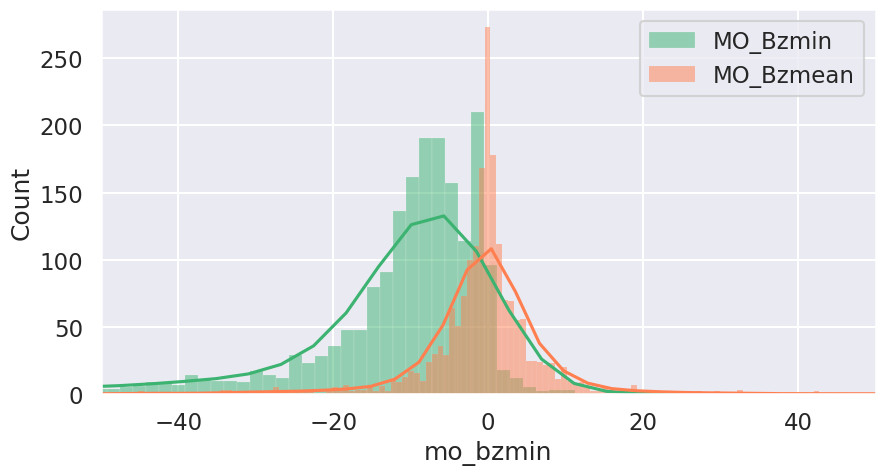

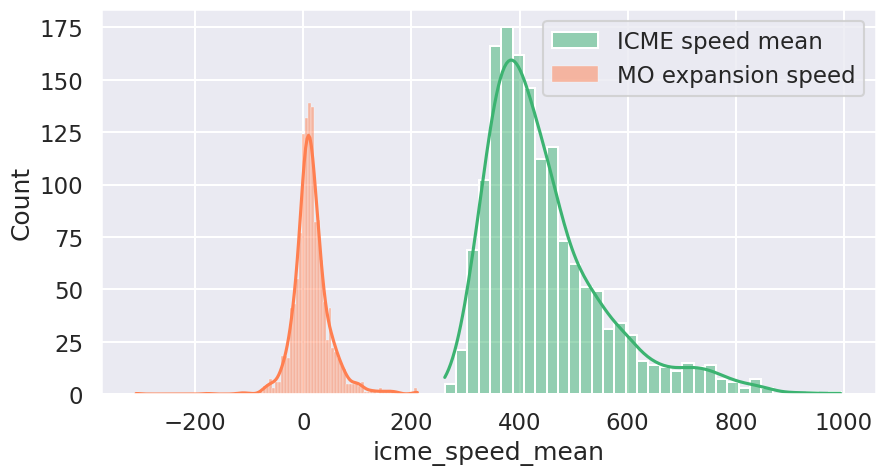

In [ ]:
#make distribution plots
plt.figure(10,figsize=(12,5))
sns.histplot(ic.mo_sc_heliodistance)

plt.figure(11,figsize=(12,5))
sns.histplot(ic.icme_bmax, label='Bmax',color='mediumseagreen',kde=True)
sns.histplot(ic.icme_bmean, label='Bmean',color='coral',alpha=0.5,kde=True)
plt.legend(loc=1)
plt.xlim(0,100)




plt.figure(12)
sns.histplot(ic.mo_bzmin,label='MO_Bzmin',color='mediumseagreen',kde=True)
sns.histplot(ic.mo_bzmean,label='MO_Bzmean',color='coral',alpha=0.5,kde=True)
plt.legend(loc=1)
plt.xlim(-50,50)


#plt.figure(14)
#sns.distplot(ic.mo_bymean)

plt.figure(15)
sns.histplot(ic.icme_speed_mean,label='ICME speed mean',color='mediumseagreen',kde=True)
sns.histplot(ic.mo_expansion_speed,label='MO expansion speed',color='coral',alpha=0.5,kde=True)
plt.legend(loc=1)


# SIRCAT

In [ ]:
url='https://helioforecast.space/static/sync/sircat/HELIO4CAST_SIRCAT_v10.csv'
sc=pd.read_csv(url)


In [ ]:
sc

,Unnamed: 0,sircat_id,sc_insitu,sir_start_time,hss_start_time,sir_end_time,hss_end_time,hss_vtmax_time,sc_heliodistance,sc_long_heeq,...,sir_vtmax,sir_vtmean,sir_vtstd,sir_btmax,sir_btmean,sir_btstd,sir_bzmin,sir_bzmean,sir_bzstd,sir_duration
0,0,SIR_MAVEN_HUANG_20141203_01,MAVEN,2014-12-03T03:25Z,2014-12-03T13:04Z,2014-12-03T22:56Z,NaN,NaN,1.3818,-100.64,...,567.2,515.6,31.0,5.1,4.7,0.3,-1.4,0.2,1.4,9.87
1,1,SIR_MAVEN_HUANG_20141217_01,MAVEN,2014-12-17T22:25Z,2014-12-18T18:02Z,2014-12-21T02:30Z,NaN,NaN,1.3815,-106.30,...,378.7,354.9,19.6,9.2,7.0,1.7,-3.5,-0.1,1.9,56.47
2,2,SIR_MAVEN_HUANG_20141226_01,MAVEN,2014-12-26T11:58Z,2014-12-26T21:33Z,2014-12-29T05:28Z,NaN,NaN,1.3827,-109.31,...,605.9,499.0,88.0,9.4,6.0,1.6,-3.5,-0.1,1.7,55.92
3,3,SIR_MAVEN_HUANG_20141230_01,MAVEN,2014-12-30T21:29Z,2015-01-01T05:49Z,2015-01-02T23:28Z,NaN,NaN,1.3841,-111.39,...,539.0,447.7,67.8,8.3,5.3,1.3,-3.3,-0.1,2.0,41.65
4,4,SIR_MAVEN_HUANG_20150103_01,MAVEN,2015-01-03T13:00Z,2015-01-04T04:28Z,2015-01-04T23:36Z,NaN,NaN,1.3849,-112.48,...,549.5,487.9,42.2,5.5,4.4,0.8,-1.6,0.1,1.1,19.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1013,SIR_WIND_GRANDIN_20171115_01,Wind,NaN,2017-11-15T03:00Z,NaN,2017-11-17T01:00Z,2017-11-16T12:52Z,0.9806,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,1014,SIR_WIND_GRANDIN_20171120_01,Wind,NaN,2017-11-20T14:00Z,NaN,2017-11-22T20:00Z,2017-11-21T14:47Z,0.9796,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,1015,SIR_WIND_GRANDIN_20171204_01,Wind,NaN,2017-12-04T11:00Z,NaN,2017-12-08T08:00Z,2017-12-06T03:38Z,0.9773,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,1016,SIR_WIND_GRANDIN_20171211_01,Wind,NaN,2017-12-11T02:00Z,NaN,2017-12-13T05:00Z,2017-12-12T07:42Z,0.9764,-0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-13-9a837828fcf6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.sc_heliodistance)
<ipython-input-13-9a837828fcf6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.hss_vtmean)
<ipython-input-13-9a837828fcf6>:7: UserWarning: 

`distplot` is a deprecated function and will be 

<Axes: xlabel='sir_duration', ylabel='Density'>

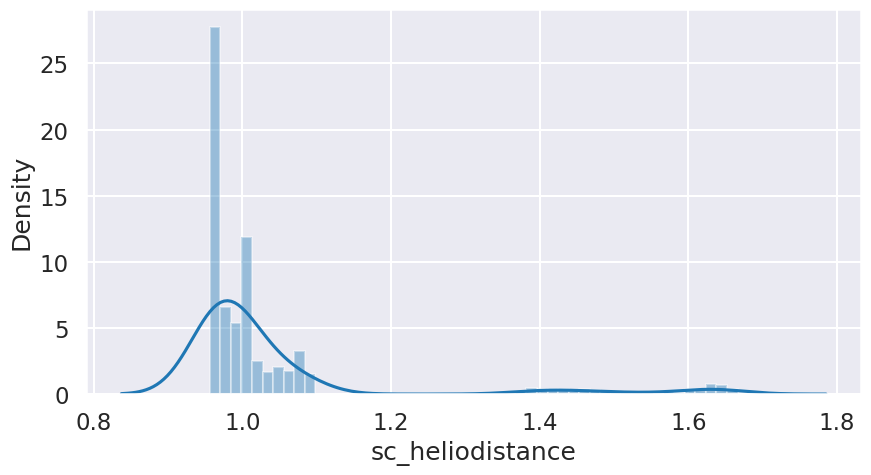

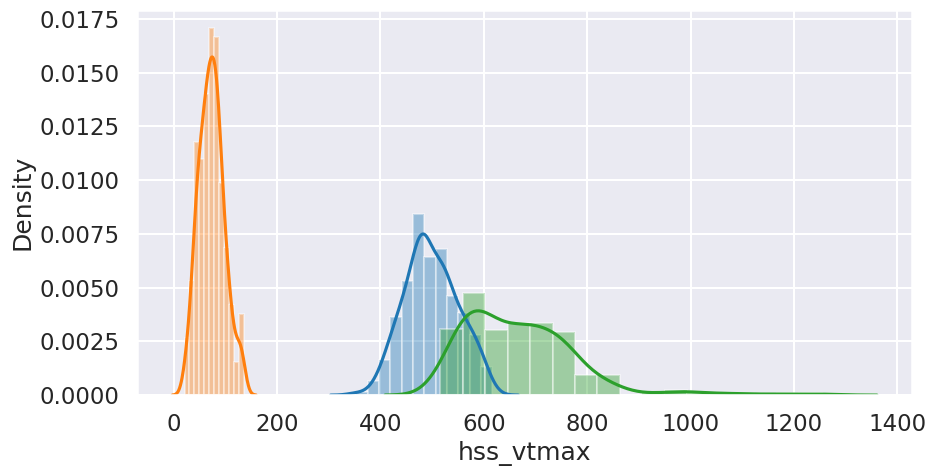

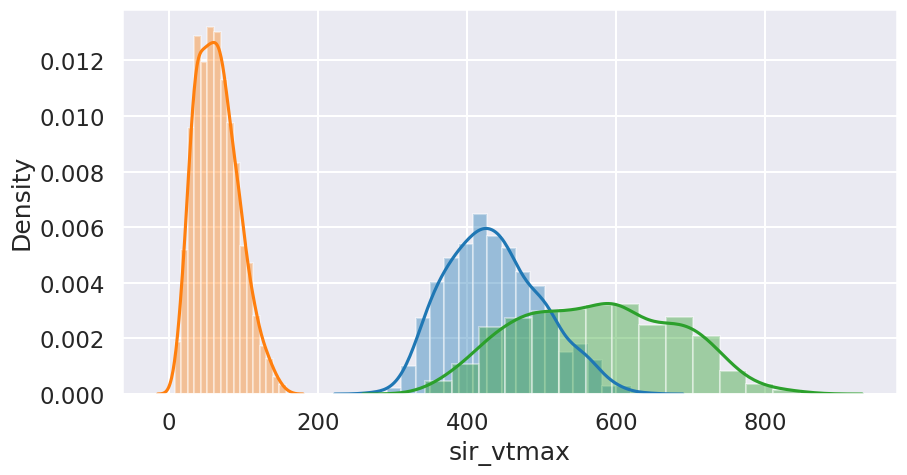

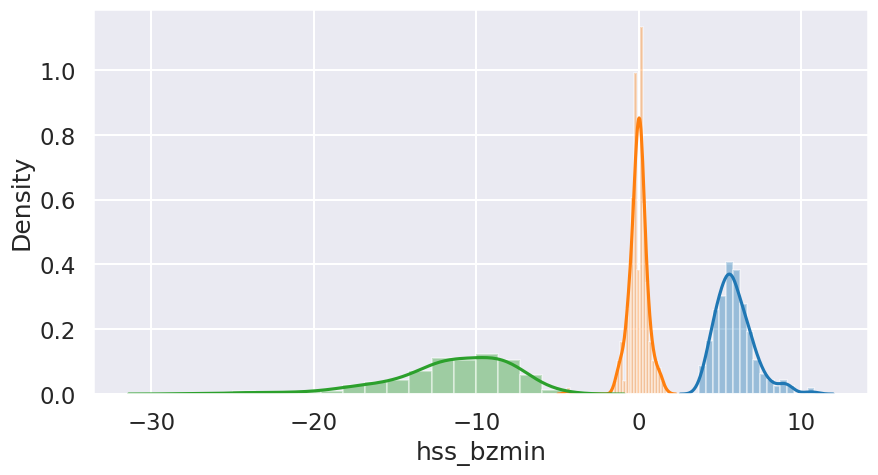

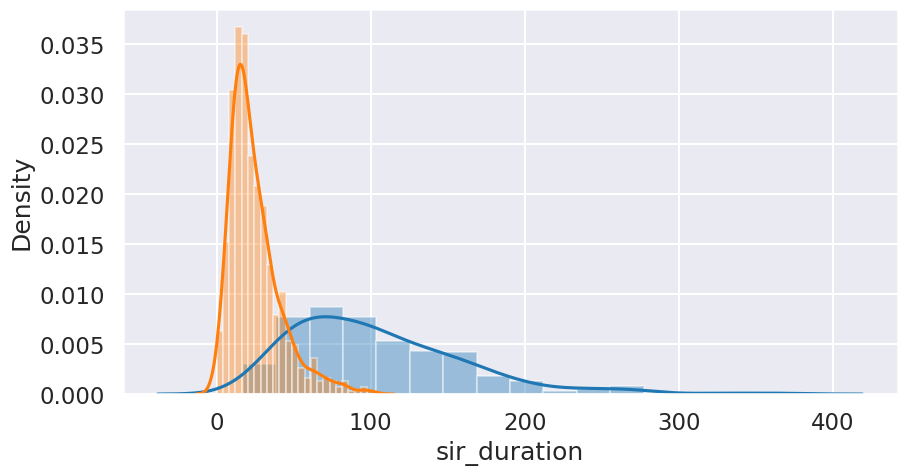

In [ ]:
#make distribution plots
plt.figure(20)
sns.distplot(sc.sc_heliodistance)

plt.figure(21)
sns.distplot(sc.hss_vtmean)
sns.distplot(sc.hss_vtstd)
sns.distplot(sc.hss_vtmax)

plt.figure(25)
sns.distplot(sc.sir_vtmean)
sns.distplot(sc.sir_vtstd)
sns.distplot(sc.sir_vtmax)


plt.figure(22)
sns.distplot(sc.hss_btmean)
sns.distplot(sc.hss_bzmean)
sns.distplot(sc.hss_bzmin)


plt.figure(23)
sns.distplot(sc.hss_duration)
sns.distplot(sc.sir_duration)


# plt.figure(23)
#
# plt.figure(24)
# sns.distplot(ic.mo_bymean)

# plt.figure(25)
# sns.distplot(ic.icme_speed_mean)
# sns.distplot(ic.mo_expansion_speed )

# Multipoint ICME catalog

In [ ]:
url='https://helioforecast.space/static/sync/lineups/HELIO4CAST_multipoint_v30.csv'
lineups=pd.read_csv(url)


In [ ]:
lineups.keys()


Index(['Unnamed: 0', 'event', 'lineupcat_id', 'event_start_time', 'spacecraft',
       'sc_heliodistance', 'sc_heeq_lon', 'sc_heeq_lat', 'cme_heeq_lon',
       'speed', 'mo_bmax', 'mo_bzmin', 'catalog_id', 'source'],
      dtype='object')

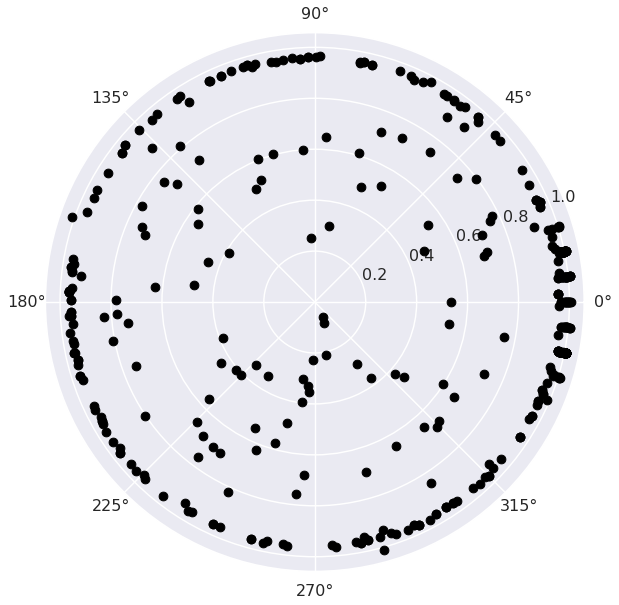

In [ ]:
fig=plt.figure(5, figsize=(15,10), dpi=70)
ax = plt.subplot(111,projection='polar')

ax.plot(lineups['sc_heeq_lon'],lineups['sc_heliodistance'], 'ko')

#note that these are all observations for in situ and imaging parameters - one would need to extract Wind, STEREO-A, Solar Orbiter to make this plot